### Word count on "William Shakespear The Tragedy of Hamlet.txt"

In [2]:
# import regex module
import re

In [3]:
# import add from operator module
from operator import add

In [10]:
# read imput file
file_in = sc.textFile('William Shakespeare - The Tragedy of Hamlet.txt')

In [12]:
# count lines
print(f'Number of lines in file: {file_in.count()}')

Number of lines in file: 7884


In [13]:
# add up lengths of each line
chars = file_in.map(lambda s: len(s)).reduce(add)
print(f'Number of characters in file: {chars}')

Number of characters in file: 186459


In [26]:
# get words from the input file
words = file_in.flatMap(lambda line: re.split('\W+', line.lower().strip()))

In [27]:
# words of more than 3 characters
words = words.filter(lambda x: len(x) > 3)

In [28]:
# set count 1 per word
words = words.map(lambda w: (w,1))

In [29]:
# reduce phase - sum count all the words
words = words.reduceByKey(add)

In [37]:
# create tuple (count, word) and sort in descending
words = words.map(lambda x: (x[1], x[0])).sortByKey(False)

In [38]:
# take top 20 words by frequency
words.take(20)

[(470, 'hamlet'),
 (407, 'that'),
 (311, 'lord'),
 (297, 'this'),
 (268, 'with'),
 (242, 'your'),
 (218, 'what'),
 (202, 'king'),
 (182, 'have'),
 (169, 'will'),
 (158, 'horatio'),
 (120, 'claudius'),
 (119, 'queen'),
 (119, 'polonius'),
 (114, 'shall'),
 (109, 'good'),
 (107, 'thou'),
 (106, 'come'),
 (105, 'laertes'),
 (104, 'they')]

In [61]:
# create function for histogram of most frequent words
%matplotlib inline
import matplotlib.pyplot as plt

def histogram(words):
    count = list(map(lambda x: x[1], words))
    word = list(map(lambda x: x[0], words))
    plt.barh(range(len(count)), count, color = 'grey')
    plt.yticks(range(len(count)), word)

In [64]:
# change order of tuple (word, count) from (count, word)
words = words.map(lambda x:(x[1], x[0]))
words.take(25)

[('hamlet', 470),
 ('that', 407),
 ('lord', 311),
 ('this', 297),
 ('with', 268),
 ('your', 242),
 ('what', 218),
 ('king', 202),
 ('have', 182),
 ('will', 169),
 ('horatio', 158),
 ('claudius', 120),
 ('queen', 119),
 ('polonius', 119),
 ('shall', 114),
 ('good', 109),
 ('thou', 107),
 ('come', 106),
 ('laertes', 105),
 ('they', 104),
 ('more', 96),
 ('there', 95),
 ('gertrude', 95),
 ('from', 95),
 ('ophelia', 87)]

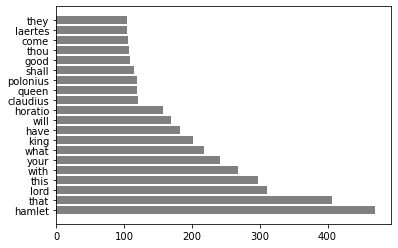

In [65]:
# display histogram
histogram(words.take(20))